In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.metrics import precision_score

In [2]:
#Yahoo finance data available only from : 17/9/2007
#Actual Stock market data available from : 3/7/1990

nifty50 = yf.Ticker("^NSEI")
nifty50 = nifty50.history(period="max")
print(nifty50.head())

                                  Open         High          Low        Close  \
Date                                                                            
2007-09-17 00:00:00+05:30  4518.450195  4549.049805  4482.850098  4494.649902   
2007-09-18 00:00:00+05:30  4494.100098  4551.799805  4481.549805  4546.200195   
2007-09-19 00:00:00+05:30  4550.250000  4739.000000  4550.250000  4732.350098   
2007-09-20 00:00:00+05:30  4734.850098  4760.850098  4721.149902  4747.549805   
2007-09-21 00:00:00+05:30  4752.950195  4855.700195  4733.700195  4837.549805   

                           Volume  Dividends  Stock Splits  
Date                                                        
2007-09-17 00:00:00+05:30       0        0.0           0.0  
2007-09-18 00:00:00+05:30       0        0.0           0.0  
2007-09-19 00:00:00+05:30       0        0.0           0.0  
2007-09-20 00:00:00+05:30       0        0.0           0.0  
2007-09-21 00:00:00+05:30       0        0.0           0.0  


In [3]:
nifty50.index

DatetimeIndex(['2007-09-17 00:00:00+05:30', '2007-09-18 00:00:00+05:30',
               '2007-09-19 00:00:00+05:30', '2007-09-20 00:00:00+05:30',
               '2007-09-21 00:00:00+05:30', '2007-09-24 00:00:00+05:30',
               '2007-09-25 00:00:00+05:30', '2007-09-26 00:00:00+05:30',
               '2007-09-27 00:00:00+05:30', '2007-09-28 00:00:00+05:30',
               ...
               '2025-03-07 00:00:00+05:30', '2025-03-10 00:00:00+05:30',
               '2025-03-11 00:00:00+05:30', '2025-03-12 00:00:00+05:30',
               '2025-03-13 00:00:00+05:30', '2025-03-17 00:00:00+05:30',
               '2025-03-18 00:00:00+05:30', '2025-03-19 00:00:00+05:30',
               '2025-03-20 00:00:00+05:30', '2025-03-21 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date', length=4294, freq=None)

<Axes: xlabel='Date'>

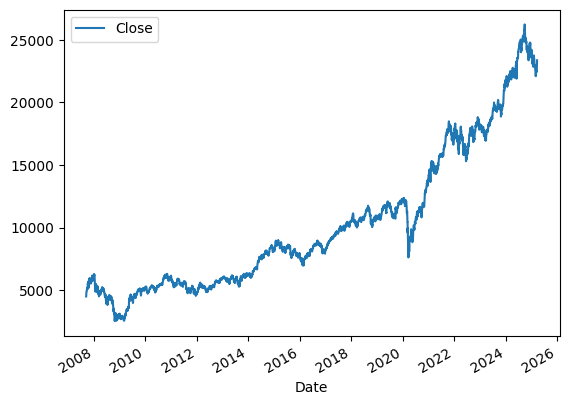

In [4]:
nifty50.plot.line(y="Close",use_index=True)

In [5]:
del nifty50["Dividends"]
del nifty50["Stock Splits"]

In [6]:
 nifty50["Tomorrow"] = nifty50["Close"].shift(-1)

In [7]:
nifty50

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,4546.200195
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,4732.350098
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,4747.549805
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,4837.549805
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,4932.200195
...,...,...,...,...,...,...
2025-03-17 00:00:00+05:30,22353.150391,22577.000000,22353.150391,22508.750000,251100,22834.300781
2025-03-18 00:00:00+05:30,22662.250000,22857.800781,22599.199219,22834.300781,272600,22907.599609
2025-03-19 00:00:00+05:30,22874.949219,22940.699219,22807.949219,22907.599609,324000,23190.650391


In [8]:
nifty50["Target"] = (nifty50["Tomorrow"]>nifty50["Close"]).astype(int)

In [9]:
nifty50

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,4546.200195,1
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,4732.350098,1
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,4747.549805,1
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,4837.549805,1
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,4932.200195,1
...,...,...,...,...,...,...,...
2025-03-17 00:00:00+05:30,22353.150391,22577.000000,22353.150391,22508.750000,251100,22834.300781,1
2025-03-18 00:00:00+05:30,22662.250000,22857.800781,22599.199219,22834.300781,272600,22907.599609,1
2025-03-19 00:00:00+05:30,22874.949219,22940.699219,22807.949219,22907.599609,324000,23190.650391,1


### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

rf_train = nifty50.iloc[:-100]
rf_test = nifty50.iloc[-100:]

predictors = ["Close" , "Volume" , "Open" , "High" , "Low"]
rf_model.fit(rf_train[predictors],rf_train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [21]:
rf_preds = rf_model.predict(rf_test[predictors])

In [26]:
rf_preds = pd.Series(rf_preds , index=rf_test.index)
rf_preds

Date
2024-10-28 00:00:00+05:30    0
2024-10-29 00:00:00+05:30    1
2024-10-30 00:00:00+05:30    0
2024-10-31 00:00:00+05:30    1
2024-11-01 00:00:00+05:30    1
                            ..
2025-03-17 00:00:00+05:30    1
2025-03-18 00:00:00+05:30    0
2025-03-19 00:00:00+05:30    0
2025-03-20 00:00:00+05:30    0
2025-03-21 00:00:00+05:30    1
Length: 100, dtype: int32

In [28]:
precision_score(rf_test["Target"],rf_preds)

0.3875

<Axes: xlabel='Date'>

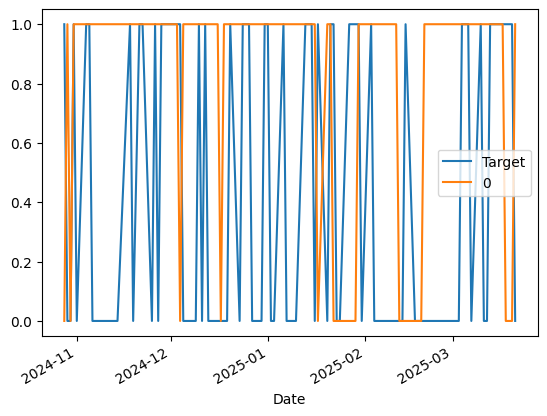

In [31]:
rf_combined = pd.concat([rf_test["Target"],rf_preds],axis=1)
rf_combined.plot()

### Back Testing Model

In [34]:
def predict(train , test , predictors , model):
    model.fit(train[predictors] , train["Target"])
    preds=model.predict(test[predictors])
    preds=pd.Series(preds , index=test.index , name="Predictions" )
    combined = pd.concat([test["Target"] , preds] , axis=1)
    return combined

In [39]:
def backtest(data , model , predictors , start=2500 , step=250):
    all_predictions = []
    
    for i in range(start , data.shape[0] , step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train , test , predictors , model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

### Check RF Model Backtest

In [40]:
predictions = backtest(nifty50 , rf_model , predictors)

In [41]:
predictions["Predictions"].value_counts()

1    1027
0     767
Name: Predictions, dtype: int64

In [42]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5335929892891919

https://www.youtube.com/watch?v=1O_BenficgE